## OkCupid DataSet
### Meeting 2, 12-11-2019


### Recap last meeting's decisions:

<ol>
  <p>Meeting 1, 16-10-2019</p>
    <li>Merge all the essays as a unique text excluding essay4, 5, 6. </li>
  <li>Plot distribution of avarage number of words per sentence.</li>
  <li>Dont apply lowercase() and expand_contractions() instead count the number of them.</li> 

</ol>


### Things to discuss about:


<ol>
  <p></p>
  <li>Re-code education feature?</li>
  <li>Treating with outliers? keep or remove? min and max threshold?</li>
  <li>Incorrect or irrelevant information such as age 109 or sentences with length 1</li>
  <li>Check list of stopwords</li>

</ol>


In [1]:
import pandas as pd
from termcolor import colored

### Load dataset 

In [2]:
#  Load dataset 
df = pd.read_csv('../../data/raw/profiles.csv')
df.columns

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')

### Missing values


In [3]:
print('\033[1m \033[94m Dataset shape:\033[0m \033[0m {}\n'.format(df.shape))
# drop rows with all null values
drop_all = df.dropna(axis='rows', how='all')
print('\033[1m \033[94m Shape of dataset after dropping the rows containing all null avlues:\033[0m \033[0m {}\n'.format(df.shape))


# drop rows in which the education field is empty
df = df.dropna(subset=['education'])
print('\033[1m \033[94m Shape of dataset after dropping the rows with null value in education:\033[0m \033[0m {}\n'.format(df.shape))

# drop rows in which all the essay fields are empty
df = df.dropna(subset=['essay0', 'essay1', 'essay2', 'essay3', 'essay7', 'essay8', 'essay9'], how = 'all')
print('\033[1m \033[94m Shape of dataset after dropping the rows with all null values in essays:\033[0m \033[0m {}\n'.format(df.shape))


  Dataset shape:  (59946, 31)

  Shape of dataset after dropping the rows containing all null avlues:  (59946, 31)

  Shape of dataset after dropping the rows with null value in education:  (53318, 31)

  Shape of dataset after dropping the rows with all null values in essays:  (51595, 31)



## Merge the essays


In [4]:
# essay 4, essay 5, essay 6 are excluded from the essays
df['text'] = df['essay0'].fillna('') +' ' + df['essay1'].fillna('')+ ' ' + df['essay2'].fillna('')+ ' '+ df['essay3'].fillna('') + ' ' + df['essay7'].fillna('') + ' ' + df['essay8'].fillna('') + ' ' + df['essay9'].fillna('')

df.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status,text
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single,about me:<br />\n<br />\ni would love to think...
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single,i am a chef: this is what that means.<br />\n1...
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available,"i'm not ashamed of much, but writing public te..."
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single,i work in a library and go to school. . . read...
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single,hey how's it going? currently vague on the pro...


## Text cleaning
* Remove all html tags

In [5]:
# Remove html tags from essays 
# df = df.replace("<br />", ' ', regex=True)
# df = df.replace("\n", "", regex = True)
df['text'] = df['text'].replace('<[^<]+?>', '', regex=True)
df.head()


,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status,text
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single,about me:\n\ni would love to think that i was ...
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single,i am a chef: this is what that means.\n1. i am...
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available,"i'm not ashamed of much, but writing public te..."
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single,i work in a library and go to school. . . read...
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single,hey how's it going? currently vague on the pro...


## Text tokenization

In [ ]:
import nltk
# nltk.download('punkt')
from nltk.tokenize import sent_tokenize

df = df.dropna(subset=['text'])

# split text to words
df['words'] = df.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)


In [ ]:
# number of words in for each user
df['#words'] = df.apply(lambda row: len(row['words']), axis=1)
# split text to sentences
df['sentences'] = df.apply(lambda row: nltk.sent_tokenize(row['text']), axis=1)
#number of sentences for each user
df['#sentences'] = df.apply(lambda row: len(row['sentences']), axis=1)
#avarage number of words per sentence
df['#anwps'] = df.apply(lambda row: row['#words']/row['#sentences'], axis=1)


In [ ]:
df.head()

### Check outliers

In [26]:
df[df['#anwps'] > 200]

,age,education,essay0,essay1,essay2,essay3,essay7,essay8,essay9,sex,text,words,#words,sentences,#sentences,#anwps,isced
1023,47,dropped out of college/university,the destruction of our planet really bothers m...,trying to avoid the dominant culture<br />\n<b...,"<a class=""ilink"" href=""/interests?i=listening""...",i don't know<br />\nprobably that i<br />\ncar...,i do not have a routine now<br />\n<br />\ngo ...,i miss sleeping with someone<br />\nbesides mi...,if this information resonates with you<br />\n...,m,the destruction of our planet really bothers m...,"[the, destruction, of, our, planet, really, bo...",316,[the destruction of our planet really bothers ...,1,316.00,3
1950,61,working on two-year college,oldest of 8 kids swiss-italian-irish family ra...,in addition to working towards retirement from...,"writing, singing, kicking back lol cooking, go...",NaN,home listening to music with the tv on sound o...,i'm overall very vanilla but i do have exhibit...,you're interested or like to know more,m,oldest of 8 kids swiss-italian-irish family ra...,"[oldest, of, 8, kids, swiss-italian-irish, fam...",276,[oldest of 8 kids swiss-italian-irish family r...,1,276.00,3
2740,24,working on law school,sorry i'm in pajamas but i just got off the pj...,after ucla i worked in west la for a bit<br />...,rocking out<br />\nlistening to sad songs<br /...,"- i care about presentation &amp; you should, ...",out<br />\n<br />\nboi,NaN,1. you're chill<br />\n2. you're smart<br />\n...,m,sorry i'm in pajamas but i just got off the pj...,"[sorry, i, 'm, in, pajamas, but, i, just, got,...",250,[sorry i'm in pajamas but i just got off the p...,1,250.00,7
3733,23,graduated from high school,"i'm very liberal ,love doing new things and ha...",everything that i can while i'm alive<br />\nl...,connecting with other ppl<br />\ni'm a social ...,that i spend a lot of time taking care of my s...,thinking about what to do....but i guess thats...,i don't really have anything to hide you ask m...,"your mature,secure and optimistic<br />\ni'm a...",m,"i'm very liberal ,love doing new things and ha...","[i, 'm, very, liberal, ,, love, doing, new, th...",262,"[i'm very liberal ,love doing new things and h...",1,262.00,3
3739,24,working on college/university,i describe my self in two word funny n crazy.....,rite now im in collegue trying to make my futu...,"soccer, computers n dance i love to dance n i ...",that im always in a gud mood,i spend my fridays night at home.with my frien...,thats personal,well im not stranger so every gurl who think i...,m,i describe my self in two word funny n crazy.....,"[i, describe, my, self, in, two, word, funny, ...",224,[i describe my self in two word funny n crazy....,1,224.00,3
4407,22,working on college/university,so i figured now would be a good time to actua...,working... alot<br />\nlol as of right now i'm...,"making a fool of myself, having a good time in...","my smilee... and lately my eyes, and to be hon...",if i'm not working i'm trying to find people t...,i'm a freak lol i can't even hide that lol<br ...,your interested duhhh,f,so i figured now would be a good time to actua...,"[so, i, figured, now, would, be, a, good, time...",438,[so i figured now would be a good time to actu...,2,219.00,3
6938,35,dropped out of space camp,vegan<br />\nunicorns<br />\nself sabotage<br ...,i am the mayor of oakland- i recently grew an ...,"eatiing other peoples leftovers, cookin awesom...",my mad dancin skils n charming disposition and...,gettin awesome somewhere weird or chillin with...,"i used to hate soup, i am now a big fan also i...",you like awsome things like tattoos n unicorns...,m,vegan\nunicorns\nself sabotage\nlambretta\ni p...,"[vegan, unicorns, self, sabotage, lambretta, i...",270,[vegan\nunicorns\nself sabotage\nlambretta\ni ...,1,270.00,-1
7394,23,working on college/university,what do i say here i do not know just trying t...,going to school and studying and showering and...,chess,NaN,hittin the town with pals,i act

In [13]:
# v = df[df['#sentences'] == 1 ]
# # v
# v['sentences'].loc[40483]

# # whole paraghraph is counted as one sentence. 

In [14]:
# # Print longest sentence in the text
# v = df[df['#sentences'] == 1 ]
# # v
# v['sentences'].loc[14509]


##  Unique values in the 'education' column 

In [15]:
df['education'].unique()

array(['working on college/university', 'working on space camp',
       'graduated from masters program',
       'graduated from college/university', 'working on two-year college',
       'working on masters program', 'graduated from space camp',
       'college/university', 'dropped out of space camp',
       'graduated from ph.d program', 'graduated from law school',
       'working on ph.d program', 'two-year college',
       'graduated from two-year college', 'working on med school',
       'dropped out of college/university', 'space camp',
       'graduated from med school', 'graduated from high school',
       'dropped out of high school', 'working on high school',
       'masters program', 'dropped out of ph.d program',
       'dropped out of two-year college', 'dropped out of med school',
       'high school', 'working on law school', 'law school',
       'dropped out of masters program', 'ph.d program',
       'dropped out of law school', 'med school'], dtype=object)

##  Create a dictainary of educations

In [16]:
dic = {
    "graduated from college/university" : "6",
    "graduated from masters program" : "7",
    "working on college/university" : "3",
    "working on masters program" : "6",
    "graduated from two-year college" : "5",
    "graduated from high school" : "3",
    "graduated from ph.d program" : "8",
    "graduated from law school" : "8",
    "working on two-year college" : "3",
    "dropped out of college/university" : "3",
    "working on ph.d program" : "7",
    "college/university" : "6",
    "graduated from space camp" : "-1",
    "dropped out of space camp" : "-1",
    "graduated from med school" : "8",
    "working on space camp" : "-1",
    "working on law school" : "7",
    "two-year college" : "3",
    "working on med school" : "7",
    "dropped out of two-year college" : "3",
    "dropped out of masters program" : "6",
    "masters program" : "6",
    "dropped out of ph.d program" : "7",
    "dropped out of high school" : "1",
    "high school" : "3",
    "working on high school" : "1",
    "space camp" : "-1",
    "ph.d program" : "7",
    "law school" : "8",
    "dropped out of law school" : "7",
    "dropped out of med school" : "7",
    "med school" : "8",
}

In [17]:
df['isced'] = df['education']
df = df.replace(dict(isced = dic))  
df.head()

,age,education,essay0,essay1,essay2,essay3,essay7,essay8,essay9,sex,text,words,#words,sentences,#sentences,#anwps,isced
0,22,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet!<br />\nyou...,m,about me:\n\ni would love to think that i was ...,"[about, me, :, i, would, love, to, think, that...",440,[about me:\n\ni would love to think that i was...,34,12.941176,3
1,35,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,NaN,i am very open and will share just about anyth...,NaN,m,i am a chef: this is what that means.\n1. i am...,"[i, am, a, chef, :, this, is, what, that, mean...",185,"[i am a chef: this is what that means., 1. i a...",17,10.882353,-1
2,38,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ...",m,"i'm not ashamed of much, but writing public te...","[i, 'm, not, ashamed, of, much, ,, but, writin...",604,"[i'm not ashamed of much, but writing public t...",34,17.764706,7
3,23,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,NaN,NaN,you feel so inclined.,m,i work in a library and go to school. . . read...,"[i, work, in, a, library, and, go, to, school,...",44,"[i work in a library and go to school., ., ., ...",4,11.000000,3
4,29,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,NaN,NaN,NaN,m,hey how's it going? currently vague on the pro...,"[hey, how, 's, it, going, ?, currently, vague,...",75,"[hey how's it going?, currently vague on the p...",6,12.500000,6


In [18]:

dfx = df.groupby('isced').count()/n
dfx['education'].plot(kind='bar')

### The sumary statistics of quantitative variables

In [19]:
# Print out the sumary statistics of quantitative variables
df.describe()

,age,#words,#sentences,#anwps
count,51595.000000,51595.000000,51595.000000,51595.000000
mean,32.293187,305.433201,18.011183,18.878630
std,9.402740,249.610902,14.492689,13.903379
min,18.000000,1.000000,1.000000,1.000000
25%,26.000000,145.000000,9.000000,13.352941
50%,30.000000,252.000000,15.000000,16.571429
75%,37.000000,400.000000,23.000000,20.760263
max,109.000000,12146.000000,460.000000,514.000000


## Visualizing the distribution of a dataset

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)


In [21]:
import mpld3
mpld3.enable_notebook()
import numpy as np

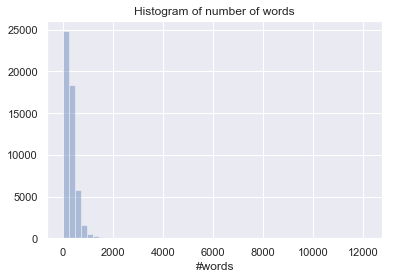

In [22]:
# Histogram for number of words
count, bin_edges = np.histogram(df['#words'])
sns.distplot(df["#words"], kde=False).set_title("Histogram of number of words")
plt.show()
# df['#words'].plot(kind='hist', xticks = bin_edges, bins=100)
# plt.show()


##  number of words histogram summarty:
### The distribution of the number of words for Cupid essays dataset is unimodal and skewed right at about 1200 with most number of the words bening between 0 and 220, range of roughly 12000 and ouliers are present on the higher end 

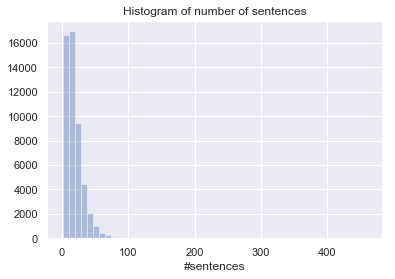

In [23]:
# Histogram for number of sentences
sns.distplot(df["#sentences"], kde=False).set_title("Histogram of number of sentences")
plt.show()

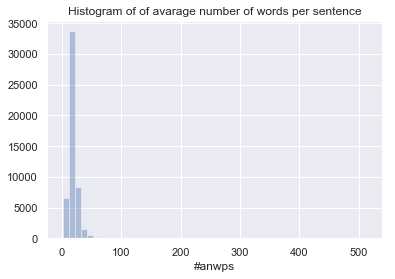

In [24]:
# Histogram for avarage number of words per sentence
sns.distplot(df["#anwps"], kde=False).set_title("Histogram of of avarage number of words per sentence")
plt.show()

##  Avarage number of words per sentence histogram summarty:
### The distribution of the avarage number of words per sentence for Cupid essays dataset is unimodal and skewed right, centered at about 15 and outliers are present on the higher end

Text(0.5, 1.0, 'Boxplot of the avarage number of words per sentence')

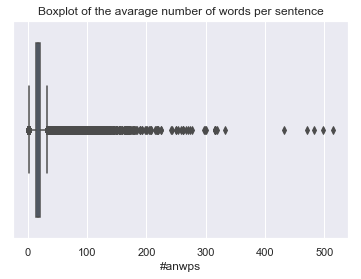

In [25]:
# Create a boxplot
sns.boxplot(df["#anwps"]).set_title("Boxplot of the avarage number of words per sentence")


Text(0.5, 1.0, 'Boxplot of the avarage number of words per sentence for men and women')

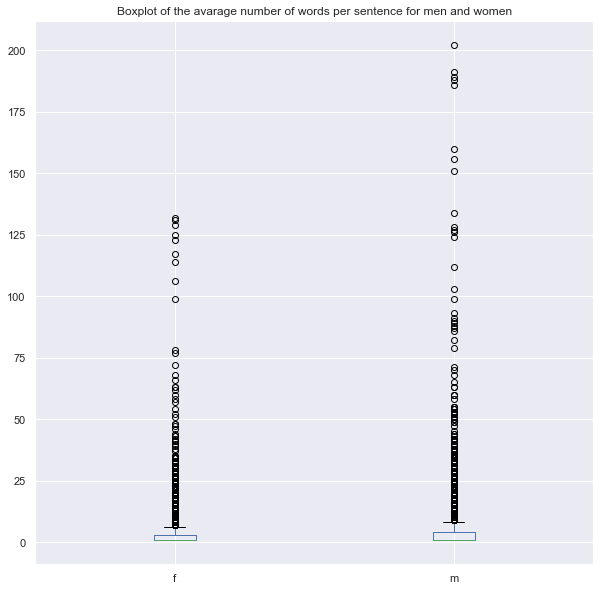

In [26]:
# Plot boxplot of #anwps for men and women
df.groupby(['sex'])['#anwps'].value_counts().unstack(0).boxplot(figsize=(10,10))
plt.title("Boxplot of the avarage number of words per sentence for men and women")

### Top 20 common words in the text before removing stopwords

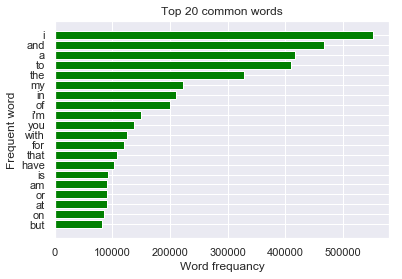

In [27]:
from collections import Counter
top = Counter(" ".join(df["text"]).split()).most_common(20)
top=top[::-1]

x, frequancy = zip(*top)

x_pos = [i for i, _ in enumerate(x)]
# x_pos.reverse()

plt.barh(x_pos, frequancy, color='green')
plt.ylabel("Frequent word")
plt.xlabel("Word frequancy")
plt.title("Top 20 common words")
plt.yticks(x_pos, x)
plt.show()

### Data cleaning

In [28]:
import string
from string import punctuation


# Remove punctuation
def remove_punctuation(s):
    s = ''.join([i for i in s if i not in frozenset(string.punctuation)])
    return s

df['removed_punctuation'] = df.apply(lambda x: remove_punctuation(x['text']), axis=1)


In [29]:
import contractions

# def expand_contractions(text):
#     expanded = contractions.fix(text)
#     return expanded
# # print(contractions.fix("you've"))
# # print(contractions.fix("he's"))

# df['expanded_contractions'] = df.apply(lambda x: expand_contractions(x['removed_punctuation']), axis=1)

# def cc(text):
#     count = 0
#     for word in text.lower().split():
#         word = word.strip(punctuation)
#         if word in contractions:
#             count += 1
#     return count



In [30]:
from sklearn.feature_extraction import stop_words

# Remove stopwords
def remove_stopwords(text):
    stopword_list = stop_words.ENGLISH_STOP_WORDS
    text = ' '.join([word for word in text.split() if word not in stopword_list])
    return text

df['removed_stopwords'] = df.apply(lambda x: remove_stopwords(x['removed_punctuation']), axis=1)


In [31]:
# Remove numbers
df.removed_stopwords = df.removed_stopwords.str.replace('\d+', '')


### Top 20 common words in the text after removing stopwords

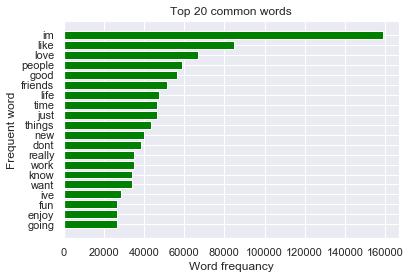

In [32]:
top = Counter(" ".join(df["removed_stopwords"]).split()).most_common(20)
top = top[::-1]
x, frequancy = zip(*top)

x_pos = [i for i, _ in enumerate(x)]
# x_pos.reverse()

plt.barh(x_pos, frequancy, color='green')
plt.ylabel("Frequent word")
plt.xlabel("Word frequancy")
plt.title("Top 20 common words")

plt.yticks(x_pos, x)

plt.show()

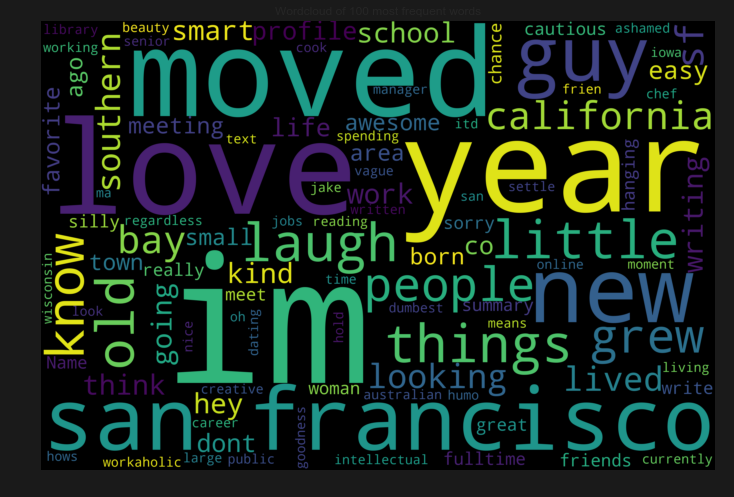

In [33]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Plot wordcloud of 100 most frequent words
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    max_words=100
    ).generate(str(df["removed_stopwords"]))
fig = plt.figure(
    figsize = (10, 7.5),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.title("Wordcloud of 100 most frequent words")
plt.show()

In [34]:
# Count number of male and female
df.groupby(['sex']).count()

,age,education,essay0,essay1,essay2,essay3,essay7,essay8,essay9,text,words,#words,sentences,#sentences,#anwps,education_abrv,removed_punctuation,removed_stopwords
sex,,,,,,,,,,,,,,,,,,
f,21097,21097,19800,19159,18502,18236,17658,14898,17149,21097,21097,21097,21097,21097,21097,21097,21097,21097
m,30498,30498,29084,28255,27048,25624,25519,22288,25754,30498,30498,30498,30498,30498,30498,30498,30498,30498


Text(0.5, 1.0, 'Frequency of participants based of their sex and level of education')

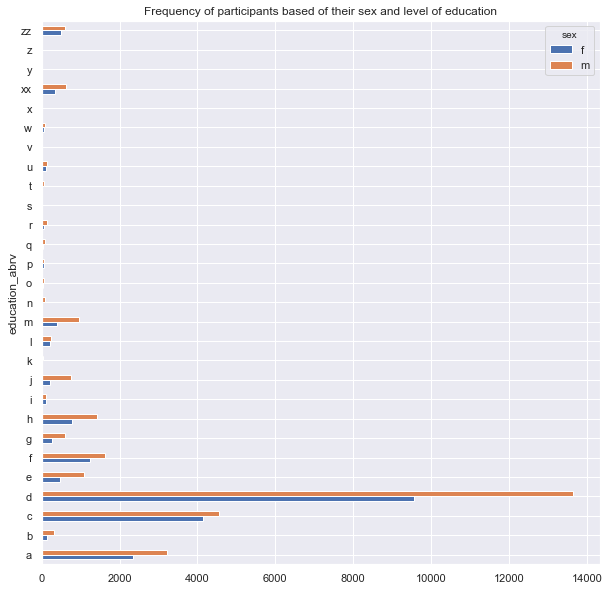

In [35]:
# Plot frequency of participants based of their sex and level of education
df.groupby(['sex']).education_abrv.value_counts().unstack(0).plot.barh(figsize=(10,10))
plt.title("Frequency of participants based of their sex and level of education")

In [36]:
print(dic)

{'working on college/university': 'a', 'working on space camp': 'b', 'graduated from masters program': 'c', 'graduated from college/university': 'd', 'working on two-year college': 'e', 'working on masters program': 'f', 'graduated from space camp': 'g', 'college/university': 'h', 'dropped out of space camp': 'e', 'graduated from ph.d program': 'f', 'two-year college': 'g', 'graduated from two-year college': 'h', 'working on med school': 'i', 'dropped out of college/university': 'j', 'space camp': 'k', 'graduated from med school': 'l', 'graduated from high school': 'm', 'dropped out of high school': 'n', 'working on high school': 'o', 'masters program': 'p', 'dropped out of ph.d program': 'q', 'dropped out of two-year college': 'r', 'dropped out of med school': 's', 'high school': 't', 'working on law school': 'u', 'law school': 'v', 'dropped out of masters program': 'w', 'ph.d program': 'x', 'dropped out of law school': 'y', 'med school': 'z', 'working on ph.d program': 'xx', 'graduat

Text(0.5, 1.0, 'Frequency of participants based of their sex and age')

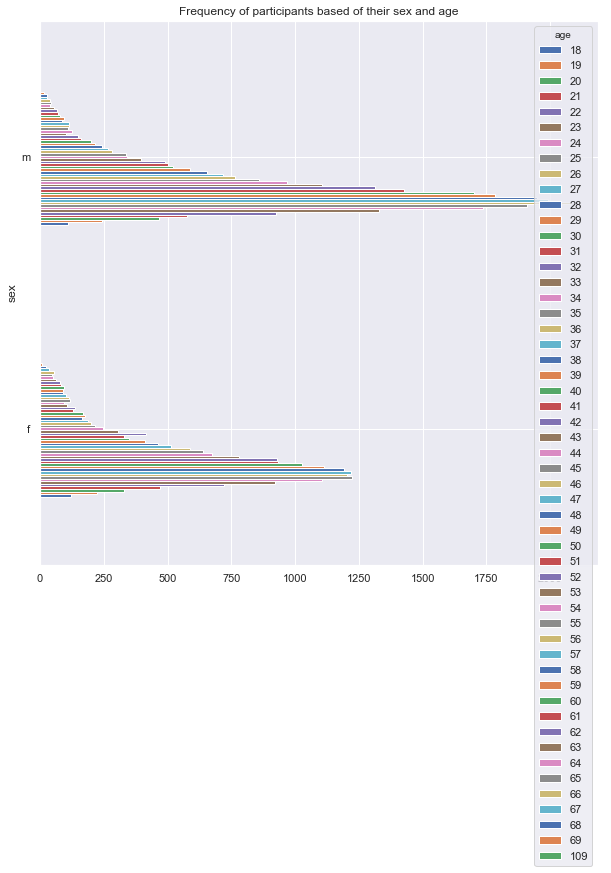

In [37]:
# Plot frequency of participants based of their sex and age
df.groupby(['age']).sex.value_counts().unstack(0).plot.barh(figsize=(10,10))
plt.title("Frequency of participants based of their sex and age")

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt

In [39]:
# df.plot(kind="hist", bins= 150, y='#anwps', title='avarage number of words per sentence distribution')


In [40]:
# Sort the rows of dataset ascending based on the #anwps
df.sort_values(['#anwps'], ascending=False, inplace=True)


In [41]:
df2 = df.groupby(['education'], axis=0).sum()


In [42]:
df2.sort_values(['#anwps'], ascending=False, inplace=True)
df2

,age,#words,#sentences,#anwps
education,,,,
graduated from college/university,749977,7043025,417903,423811.769373
graduated from masters program,317489,2854746,163551,165699.220867
working on college/university,138399,1567085,94366,104084.154695
graduated from high school,40474,296879,16807,32721.785999
working on masters program,48599,520860,31183,30392.207738
graduated from two-year college,51609,396617,23631,29846.027970
graduated from ph.d program,48221,438015,24437,23465.660133
working on two-year college,26335,273950,16220,22104.579065
graduated from law school,39487,358879,21116,19719.880225


In [50]:
df3 = df.groupby(['education_abrv'], axis=0).sum()
df3.sort_values(['#anwps'], ascending=False, inplace=True)

# df3['#anwps'].plot(kind='pie')
# plt.title('fdgdfg')
# plt.show()

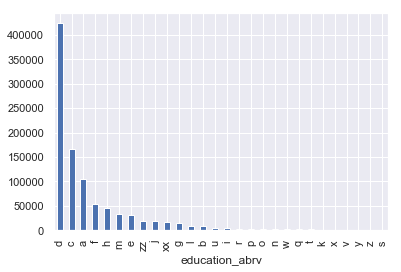

In [51]:
df4 = df3['#anwps']
df4.plot(kind='bar')

In [70]:
# v = df[df['#sentences'] <5 ]
# sns.relplot(x="education_abrv", y="#anwps", hue="sex", data=df4)


In [78]:
# # Print longest sentence in the text
# v = df[df['#sentences'] == 1 ]
# # v
# v['sentences'].loc[14509]